# Homework 9  Assignment 2

Prepared by eb3237



In [13]:
from __future__ import print_function, division
import pylab as pl

import os
import json

import statsmodels.api as sm
import statsmodels.formula.api as smf

#import matplotlib.pyplot as plt
import numpy as np

#s = json.load( open(os.getenv('PUI2018')+"/fbb_matplotlibrc.json") )
s = '''
{
    "lines.linewidth": 2.0,
    "axes.edgecolor": "#bcbcbc",
    "axes.facecolor": "#dddddd",
    "patch.linewidth": 1.0,
    "legend.fancybox": false,
    "font.size" : 18,
    "legend.fontsize" : "medium",
    "axes.labelsize": "large",
    "axes.grid": true,
    "grid.color": "#ffffff",
    "patch.edgecolor": "#ffffff",
    "axes.titlesize": "x-large"
}
'''
pl.rcParams.update(json.loads(s))

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [169]:
def errors(x):
    return np.sqrt(x)
def weight(x):
    return map(lambda z: 1 / errors(z) if z != 0 else 1.0, x)
def line(a, x, b=0, errors=None):
    '''
    creates a line from parameters and exogenous variable
    a: slope
    x: exogenous variable
    b: intercept - default 0
    errors: add uncertainties (sqrt(N) - default True)
    '''
    np.random.randn(123)
    if errors is None:
        return a*x + b 
    else:
        return a*x + b + np.random.randn(len(x)) * errors(x)

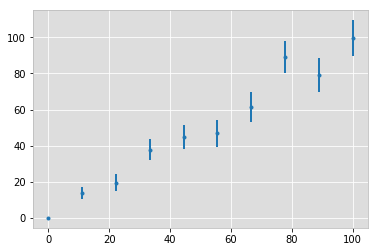

In [149]:
x = np.linspace(0, 100, num = 10)
y = line(1, x, 0, errors)  # slope = 1, intercept = 0
pl.errorbar(x, y, yerr=errors(x), fmt='.');

In [136]:
#THE WRONG WAY
smfitDoneWrong = smf.OLS(y, x).fit()
smfitDoneWrong.summary()

/usr/local/lib/python2.7/dist-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     804.2
Date:                Mon, 12 Nov 2018   Prob (F-statistic):           4.10e-10
Time:                        00:36:25   Log-Likelihood:                -32.741
No. Observations:                  10   AIC:                             67.48
Df Residuals:                       9   BIC:                             67.78
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.0188      0.036     28.359      0.000       0.938       1.100
==============================================================================
Omnibus:                        3.610   Durbin-Watson:                   1.824
Prob(Omnibus):                  0.165   Jarque-Bera (JB):                1.453
Skew:                           0.932   Prob(JB):                        0.484
Kurtosis:                       3.123   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [160]:
#THE RIGHT WAY
smfitDoneRight = smf.OLS(y, sm.add_constant(x, True)).fit()
smfitDoneRight.summary()

/usr/local/lib/python2.7/dist-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     221.3
Date:                Mon, 12 Nov 2018   Prob (F-statistic):           4.11e-07
Time:                        00:48:17   Log-Likelihood:                -31.891
No. Observations:                  10   AIC:                             67.78
Df Residuals:                       8   BIC:                             68.39
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7999      3.858      0.207      0.841      -8.098       9.697
x1             0.9676      0.065     14.875      0.000       0.818       1.118
==============================================================================
Omnibus:                        2.401   Durbin-Watson:                   2.929
Prob(Omnibus):                  0.301   Jarque-Bera (JB):                0.756
Skew:                           0.670   Prob(JB):                        0.685
Kurtosis:                       3.130   Cond. No.                         110.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### The difference between two models is in R-squared. When constant is added, R-squared decreases from 0.986 to 0.952

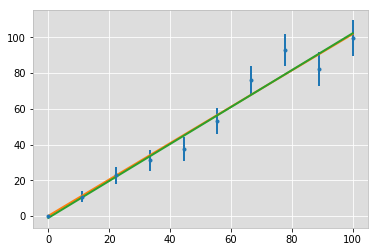

In [146]:
pl.errorbar(x, y, yerr=errors(x), fmt='.')
pl.plot(x, smfitDoneWrong.fittedvalues, '-', label="wrong")
pl.plot(x, smfitDoneRight.fittedvalues, '-', label="right");

#### Two models are almost identical and fit the data well. 

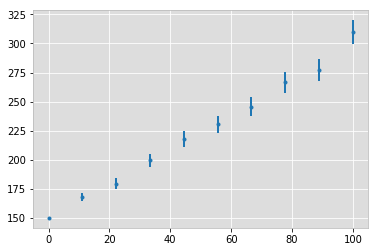

In [137]:
xx = np.linspace(0, 100, num = 10)
yy = line(1.5, xx, 150, errors)  # slope = 1.5, intercept = 100 * slope
pl.errorbar(xx, yy, yerr=errors(xx), fmt='.');

In [139]:
#THE WRONG WAY
smfitDoneWrong1 = smf.OLS(yy, xx).fit()
smfitDoneWrong1.summary()

/usr/local/lib/python2.7/dist-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     65.31
Date:                Mon, 12 Nov 2018   Prob (F-statistic):           2.04e-05
Time:                        00:38:40   Log-Likelihood:                -58.001
No. Observations:                  10   AIC:                             118.0
Df Residuals:                       9   BIC:                             118.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             3.6302      0.449      8.082      0.000       2.614       4.646
==============================================================================
Omnibus:                        1.269   Durbin-Watson:                   0.077
Prob(Omnibus):                  0.530   Jarque-Bera (JB):                0.693
Skew:                           0.071   Prob(JB):                        0.707
Kurtosis:                       1.718   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [147]:
#THE RIGHT WAY
smfitDoneRight1 = smf.OLS(yy, sm.add_constant(xx)).fit()
smfitDoneRight.summary()

/usr/local/lib/python2.7/dist-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     215.6
Date:                Mon, 12 Nov 2018   Prob (F-statistic):           4.55e-07
Time:                        00:45:02   Log-Likelihood:                -32.694
No. Observations:                  10   AIC:                             69.39
Df Residuals:                       8   BIC:                             69.99
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.1448      4.181     -0.274      0.791     -10.787       8.497
x1             1.0351      0.070     14.683      0.000       0.873       1.198
==============================================================================
Omnibus:                        2.419   Durbin-Watson:                   1.844
Prob(Omnibus):                  0.298   Jarque-Bera (JB):                0.987
Skew:                           0.768   Prob(JB):                        0.611
Kurtosis:                       2.918   Cond. No.                         110.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

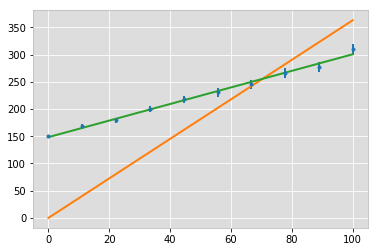

In [148]:
pl.errorbar(xx, yy, yerr=errors(xx), fmt='.')
pl.plot(xx, smfitDoneWrong1.fittedvalues, '-', label="wrong")
pl.plot(xx, smfitDoneRight1.fittedvalues, '-', label="right");

In [172]:
smfitDoneRightWLS = smf.WLS(yy, sm.add_constant(x, True), weight(x)).fit()
smfitDoneRightWLS.summary();

/usr/local/lib/python2.7/dist-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


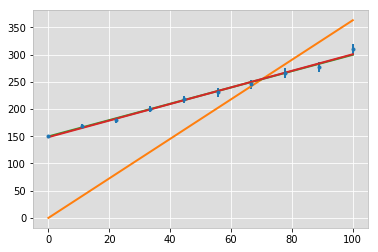

In [171]:
pl.errorbar(xx, yy, yerr=errors(xx), fmt='.')
pl.plot(xx, smfitDoneWrong1.fittedvalues, '-', label="wrong")
pl.plot(xx, smfitDoneRightWLS.fittedvalues, '-', label="WLS")
pl.plot(xx, smfitDoneRight1.fittedvalues, '-', label="right");